In [1]:
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

def get_NLA_data():
    with open(os.path.join(data_path, 'NLA07_mldata.csv'), 'r') as data_file:
        df = pd.read_csv(data_file)

    return df


def get_NRSA_data():
    with open(os.path.join(data_path, 'NRSA08_mldata.csv'), 'r') as data_file:
        df = pd.read_csv(data_file)

    return df

data_path = './data'
NRSA_targets = ['doc', 'no3', 'tn', 'tp']
NLA_targets = ['doc', 'no3no2', 'tn', 'tp']


# NRSA data

In [2]:
NRSA = get_NRSA_data()

In [3]:
NRSA.drop(NRSA_targets, axis=1).head()

,sort,year,siteid,lat,long,epareg,strorder,area,elev,forest,...,canopy,impsurf,dams,nh4wetdep,no3wetdep,tinwetdep,tempmax,tempmin,flow_cfs,velocity_fps
0,1,2008,OWW04440-0595,39.014908,-98.010465,7,2nd,22.320400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2008,OWW04440-0163,37.395285,-98.926280,7,3rd,168.246002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2008,OWW04440-0115,38.198927,-95.427684,7,2nd,19.976500,329.860,9.362,...,7.452,0.731,0.150,4.925734,10.370972,6.167586,19.29,6.89,1.26314,0.70471
3,4,2008,OWW04440-0291,37.477020,-98.365341,7,3rd,141.514008,543.304,0.850,...,1.282,0.221,0.000,3.023332,5.803630,3.658627,20.80,6.79,11.22980,1.06813
4,5,2008,FW08KS012,37.786624,-96.429970,7,4th,101.594002,428.278,2.470,...,2.157,0.330,0.089,4.477946,9.008008,5.511990,19.88,6.82,19.34894,1.02710


In [4]:
NRSA.head()

,sort,year,siteid,lat,long,epareg,strorder,doc,no3,tn,...,canopy,impsurf,dams,nh4wetdep,no3wetdep,tinwetdep,tempmax,tempmin,flow_cfs,velocity_fps
0,1,2008,OWW04440-0595,39.014908,-98.010465,7,2nd,3.05,0.81812,1316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2008,OWW04440-0163,37.395285,-98.926280,7,3rd,1.02,1.96961,2219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2008,OWW04440-0115,38.198927,-95.427684,7,2nd,8.27,0.04569,2024.0,...,7.452,0.731,0.150,4.925734,10.370972,6.167586,19.29,6.89,1.26314,0.70471
3,4,2008,OWW04440-0291,37.477020,-98.365341,7,3rd,2.22,3.36978,3963.0,...,1.282,0.221,0.000,3.023332,5.803630,3.658627,20.80,6.79,11.22980,1.06813
4,5,2008,FW08KS012,37.786624,-96.429970,7,4th,1.47,0.21067,362.0,...,2.157,0.330,0.089,4.477946,9.008008,5.511990,19.88,6.82,19.34894,1.02710


In [5]:
NRSA.shape

(2320, 31)

In [6]:
NRSA.dtypes

sort              int64
year              int64
siteid           object
lat             float64
long            float64
epareg            int64
strorder         object
doc             float64
no3             float64
tn              float64
tp              float64
area            float64
elev            float64
forest          float64
wetland         float64
urban           float64
ag              float64
roads           float64
pop             float64
shrub           float64
slope           float64
canopy          float64
impsurf         float64
dams            float64
nh4wetdep       float64
no3wetdep       float64
tinwetdep       float64
tempmax         float64
tempmin         float64
flow_cfs        float64
velocity_fps    float64
dtype: object

In [7]:
NRSA.isnull().sum()

sort              0
year              0
siteid            1
lat               0
long              0
epareg            0
strorder          0
doc               8
no3              66
tn                8
tp                8
area              1
elev            215
forest          215
wetland         215
urban           215
ag              215
roads           215
pop             197
shrub           215
slope           215
canopy          197
impsurf         197
dams            197
nh4wetdep       215
no3wetdep       215
tinwetdep       215
tempmax         197
tempmin         197
flow_cfs        197
velocity_fps    197
dtype: int64

doc outliers
        doc
530   85.38
2193  81.03
2196  99.74

no3 outliers
           no3
1365  34.18650
1671  47.80716
2027  23.77323

tn outliers
           tn
530   25825.0
1365  34450.0
1671  48016.0
1946  26050.0

tp outliers
             tp
430    5450.725
960   11654.656
1365   5637.138
1572  10582.000
1946  11020.100



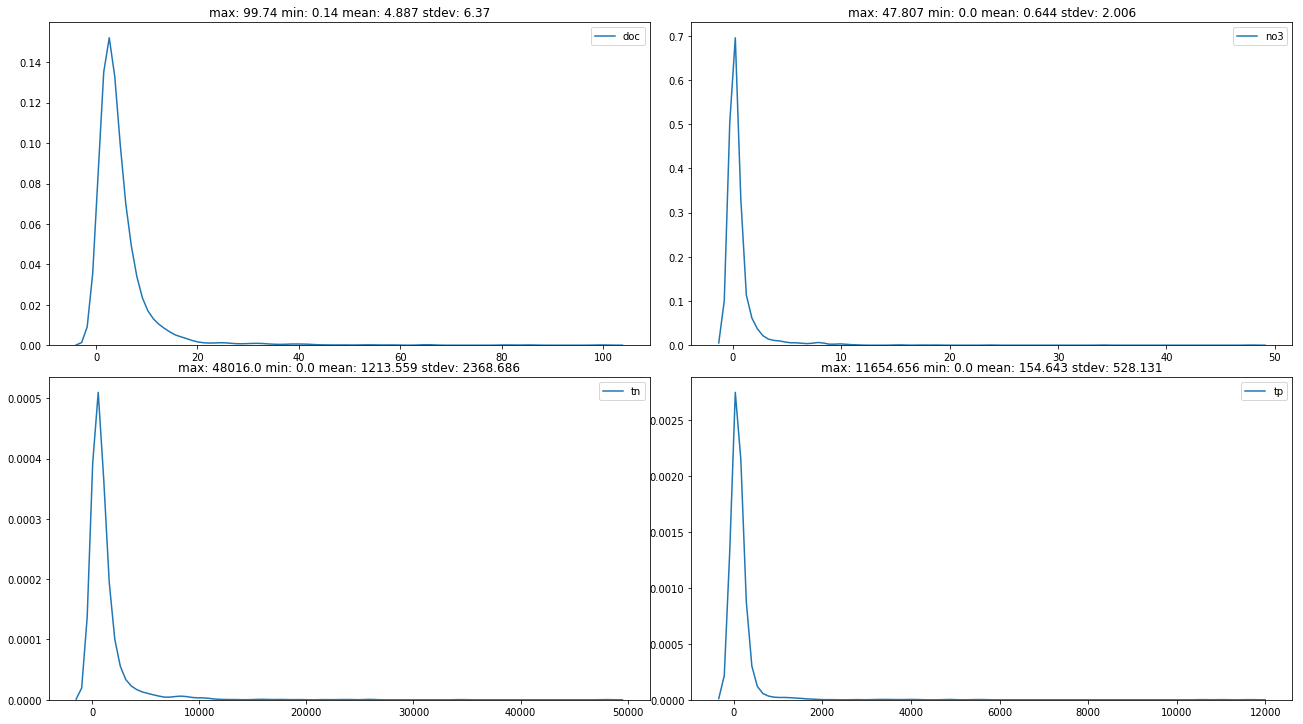

In [8]:
f, axarray = plt.subplots(ncols=2, nrows=2)
f.set_size_inches(18, 10)
f.tight_layout()

for target, ax in zip(NRSA_targets, axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([NRSA[target].max(), 
                                              NRSA[target].min(), 
                                              NRSA[target].mean(), 
                                              NRSA[target].std()], 3)
    
    sb.kdeplot(NRSA[target].dropna(), ax=ax)
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))

    outliers = NRSA.loc[NRSA[target] > mean + 10*stdev, [target]]
    if not outliers.empty:
        print('{} outliers'.format(target))
        print(outliers)
        print()

In [9]:
corr = pd.DataFrame(index=NRSA.columns[11:], columns=NRSA_targets)

for target in NRSA_targets:
    c = NRSA[NRSA.columns[11:]].corrwith(NRSA[target])
    corr[target] = c

corr.sort_values(by=['doc'], inplace=True)  # change doc to no3, tn, or tp as wanted
print(corr)
    

                   doc       no3        tn        tp
slope        -0.348958 -0.151390 -0.235117 -0.115815
forest       -0.206527 -0.209836 -0.303159 -0.178711
elev         -0.199016 -0.128846 -0.162091 -0.034485
velocity_fps -0.137248 -0.037360 -0.033228 -0.014425
canopy       -0.046297 -0.198273 -0.275120 -0.168822
flow_cfs     -0.046059  0.003634  0.031717  0.007799
area         -0.045875  0.008035  0.033152  0.012682
shrub        -0.032504 -0.075300 -0.060641  0.058268
pop          -0.023672  0.069943  0.059077  0.014629
dams         -0.015235  0.021238  0.012107  0.010325
impsurf      -0.008152  0.092678  0.091929  0.048447
urban         0.000971  0.113285  0.111942  0.047557
tempmax       0.005824 -0.010843  0.003475  0.044845
roads         0.007272  0.123539  0.125770  0.042025
no3wetdep     0.022871  0.162923  0.156812 -0.023779
tempmin       0.033345  0.039533  0.057471  0.044156
tinwetdep     0.042580  0.234506  0.253878  0.030134
nh4wetdep     0.050940  0.257470  0.290846  0.

pop outliers
      sort       pop
262    263  2455.142
1002  1003  1865.594
1059  1060  1479.595
1204  1205  1592.840

impsurf outliers
      sort  impsurf
262    263   34.406
654    655   43.847
1204  1205   51.428
1263  1264   38.597
2222  2223   34.268

dams outliers
      sort   dams
799    800  0.418
1030  1031  0.651
1735  1736  0.818
2048  2049  0.630



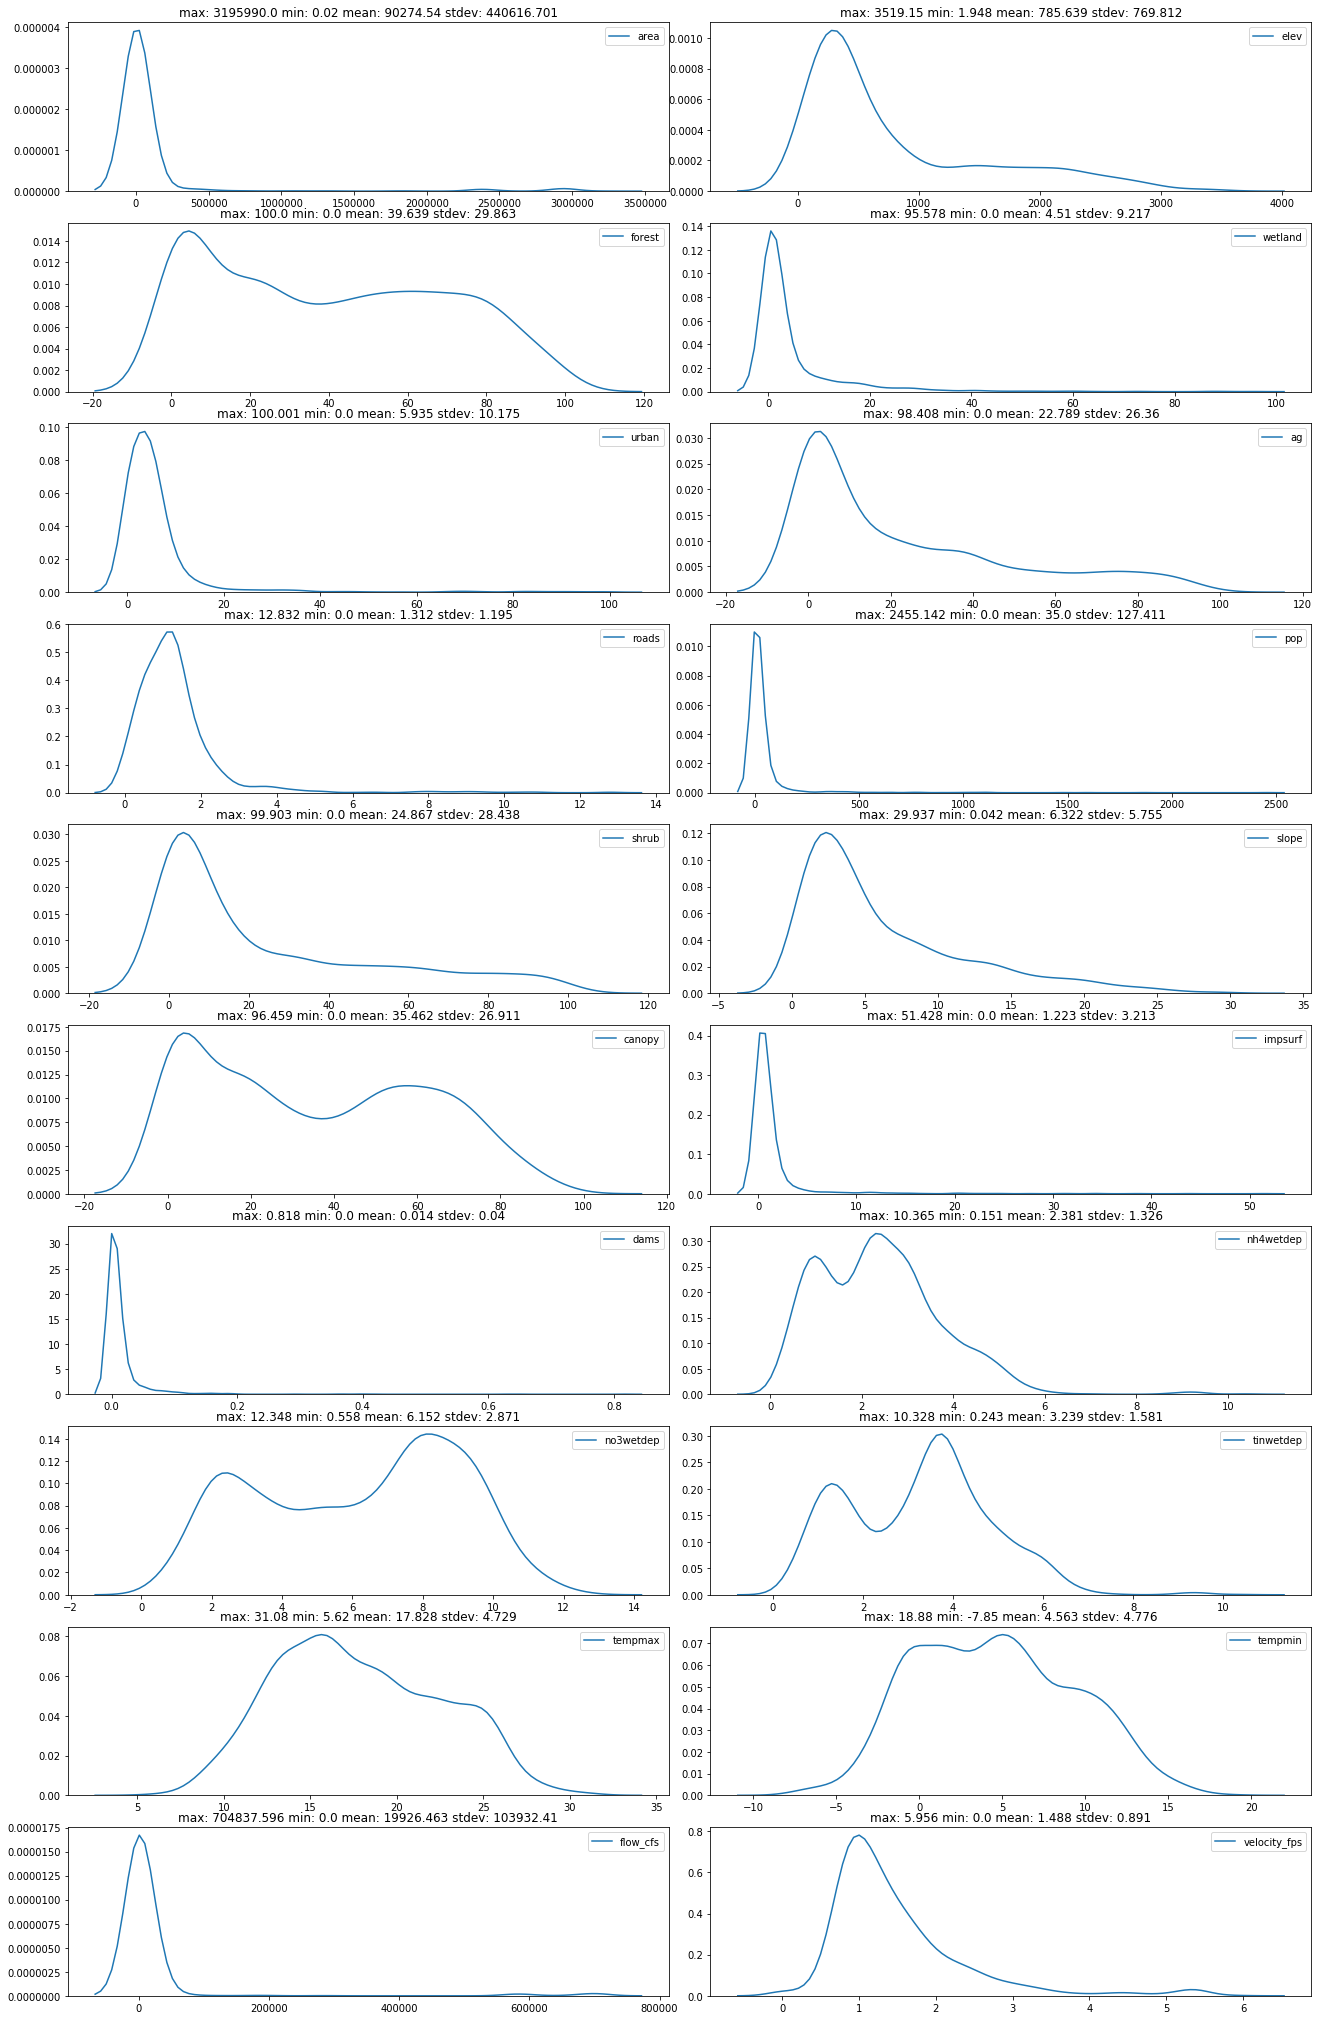

In [10]:
f, axarray = plt.subplots(ncols=2, nrows=10)
f.set_size_inches(18, 28)
f.tight_layout()

for col, ax in zip(NRSA.columns[11:], axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([NRSA[col].max(), 
                                              NRSA[col].min(), 
                                              NRSA[col].mean(), 
                                              NRSA[col].std()], 3)
    
    outliers = NRSA.loc[NRSA[col] > mean + 10*stdev, ['sort', col]]
    sb.kdeplot(NRSA[col].dropna(), ax=ax)
    
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))
    
    if not outliers.empty:
        print('{} outliers'.format(col))
        print(outliers)
        print()

# NLA data

In [11]:
NLA = get_NLA_data()

In [12]:
NLA.head()

,sort,year,siteid,lat,long,doc,no3no2,tn,tp,area,...,openh2o,water,icesnow,barren,urban,shrub,grasslnd,ag,forest,wetland
0,1,2007,NLA06608-0001,48.979029,-114.021840,0.63,0.120,151,6,3.757720,...,16.8,31.5,14.7,19.1,0.0,7.5,0.1,0.0,41.9,0.0
1,2,2007,NLA06608-0002,33.036064,-79.983791,14.02,0.005,695,36,2.290436,...,0.0,0.0,0.0,0.0,1.0,1.6,4.5,0.3,59.9,32.8
2,3,2007,NLA06608-0002,33.036064,-79.983791,14.02,0.005,695,36,2.290436,...,0.0,0.0,0.0,0.0,1.0,1.6,4.5,0.3,59.9,32.8
3,4,2007,NLA06608-0002,33.036064,-79.983791,13.80,0.000,507,25,2.290436,...,0.0,0.0,0.0,0.0,1.0,1.6,4.5,0.3,59.9,32.8
4,5,2007,NLA06608-0002,33.036064,-79.983791,13.80,0.000,507,25,2.290436,...,0.0,0.0,0.0,0.0,1.0,1.6,4.5,0.3,59.9,32.8


In [13]:
NLA.dtypes

sort          int64
year          int64
siteid       object
lat         float64
long        float64
doc         float64
no3no2      float64
tn            int64
tp            int64
area        float64
elev        float64
depth       float64
lakearea    float64
openh2o     float64
water       float64
icesnow     float64
barren      float64
urban       float64
shrub       float64
grasslnd    float64
ag          float64
forest      float64
wetland     float64
dtype: object

In [14]:
NLA.shape

(1590, 23)

In [15]:
NLA.isnull().sum()

sort        0
year        0
siteid      0
lat         0
long        0
doc         0
no3no2      0
tn          0
tp          0
area        0
elev        0
depth       1
lakearea    0
openh2o     0
water       0
icesnow     0
barren      0
urban       0
shrub       0
grasslnd    0
ag          0
forest      0
wetland     0
dtype: int64

doc outliers
      sort     doc
343    344  290.57
1364  1365  252.19
1576  1577  271.10

no3no2 outliers
     sort  no3no2
842   843   6.186
843   844   6.186
968   969   5.592

tn outliers
      sort     tn
1199  1200  26100
1364  1365  25663
1576  1577  25638

tp outliers
     sort    tp
240   241  4679
241   242  4679
242   243  4865
243   244  4865



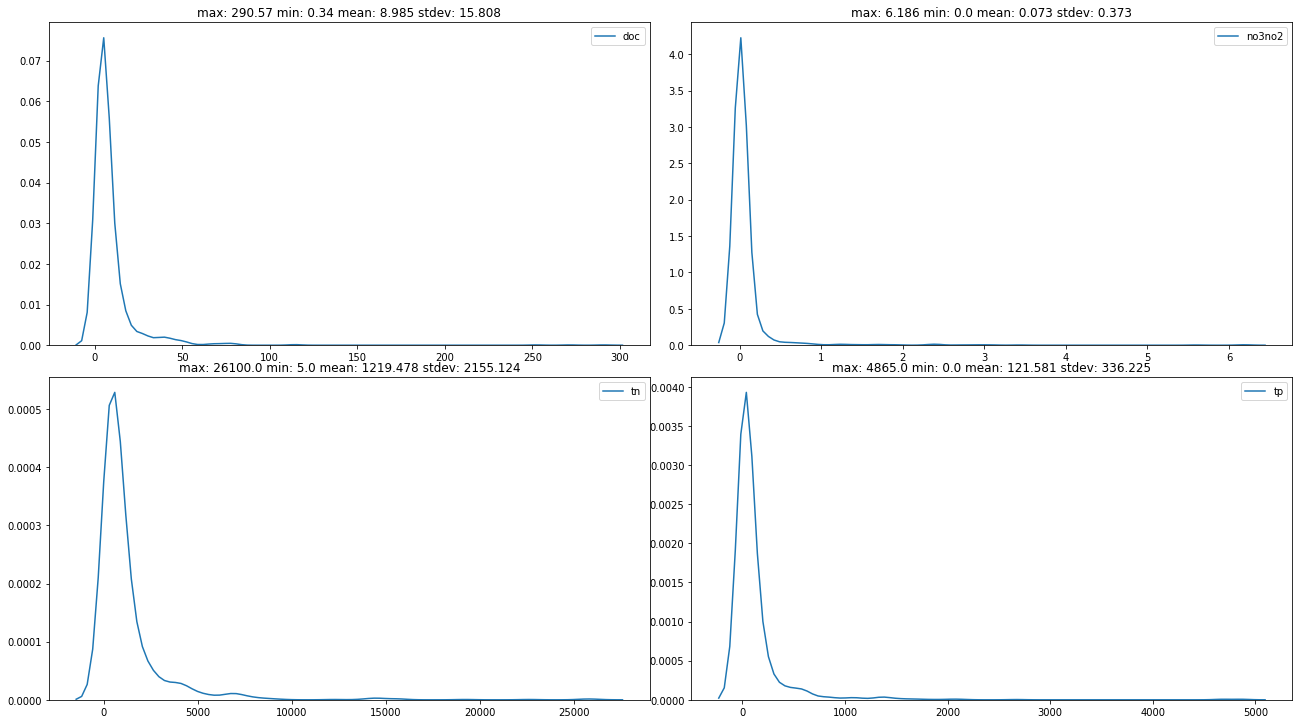

In [16]:
f, axarray = plt.subplots(ncols=2, nrows=2)
f.set_size_inches(18, 10)
f.tight_layout()

for target, ax in zip(NLA_targets, axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([NLA[target].max(), 
                                              NLA[target].min(), 
                                              NLA[target].mean(), 
                                              NLA[target].std()], 3)
    
    sb.kdeplot(NLA[target].dropna(), ax=ax)
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))

    outliers = NLA.loc[NLA[target] > mean + 10*stdev, ['sort', target]]
    if not outliers.empty:
        print('{} outliers'.format(target))
        print(outliers)
        print()

In [17]:
corr = pd.DataFrame(index=NLA.columns[11:], columns=NLA_targets)

for target in NLA_targets:
    c = NLA[NLA.columns[11:]].corrwith(NLA[target])
    corr[target] = c

corr.sort_values(by=['doc'], inplace=True)  # change doc to no3, tn, or tp as wanted
print(corr)

               doc    no3no2        tn        tp
forest   -0.290086 -0.070295 -0.371250 -0.292279
depth    -0.228390 -0.010989 -0.269515 -0.126598
urban    -0.087833  0.028328 -0.059055 -0.068008
barren   -0.076533 -0.008193 -0.075853 -0.055381
shrub    -0.071759 -0.029660 -0.096935  0.012575
icesnow  -0.039646 -0.005144 -0.043515 -0.029794
lakearea -0.024339  0.007255 -0.029980 -0.022514
wetland   0.072863 -0.052336  0.010828 -0.053058
ag        0.094691  0.188428  0.238677  0.147061
water     0.137666 -0.094565  0.150591  0.217945
openh2o   0.139695 -0.094308  0.152818  0.219475
grasslnd  0.317192 -0.030630  0.286495  0.168926


lakearea outliers
      sort     lakearea
495    496  1341.339019
604    605  1073.599005
1430  1431  1674.896101

icesnow outliers
      sort  icesnow
0        1     14.7
1160  1161      6.7
1243  1244     15.8

barren outliers
      sort  barren
623    624    55.4
741    742    55.1
957    958    51.9
1146  1147    79.6
1229  1230    55.0



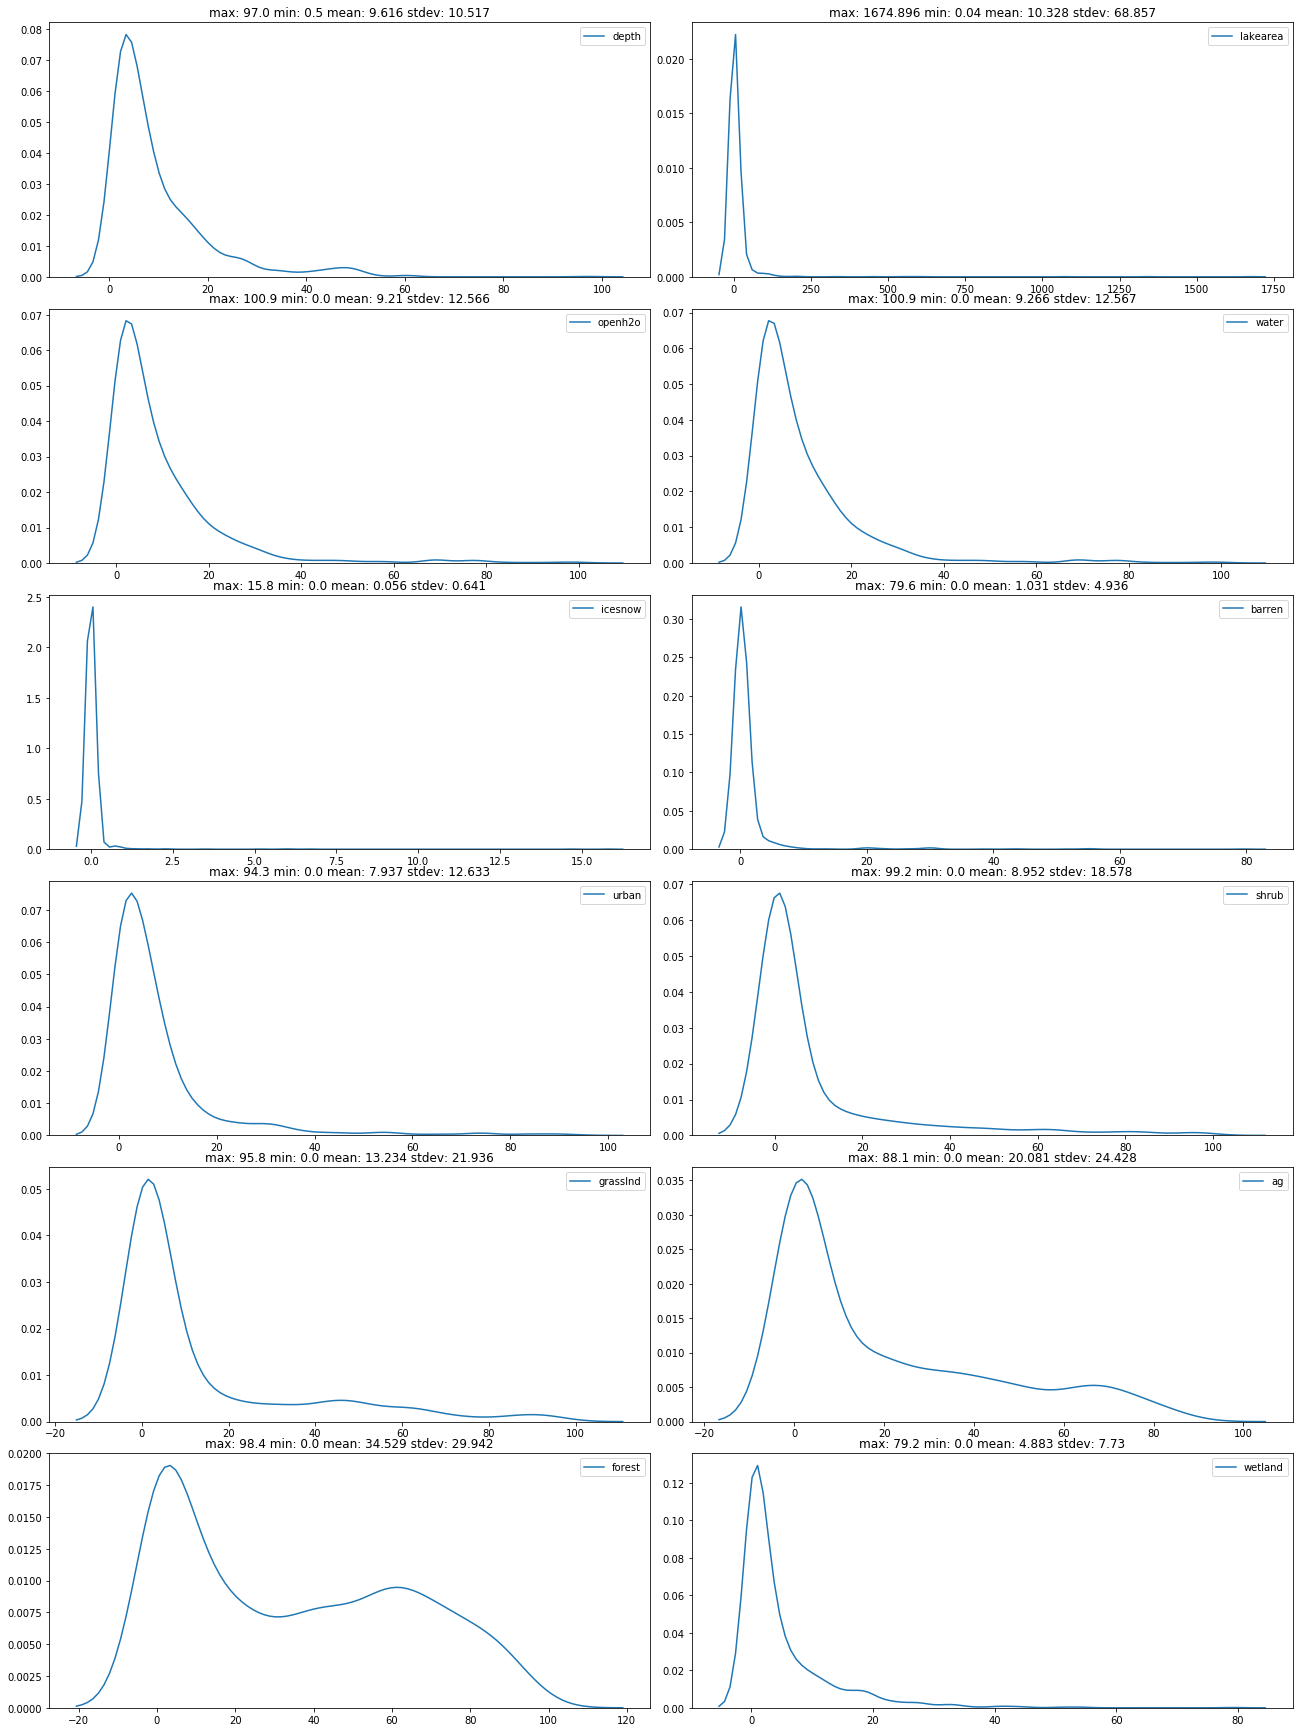

In [18]:
f, axarray = plt.subplots(ncols=2, nrows=6)
f.set_size_inches(18, 24)
f.tight_layout()

for col, ax in zip(NLA.columns[11:], axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([NLA[col].max(), 
                                              NLA[col].min(), 
                                              NLA[col].mean(), 
                                              NLA[col].std()], 3)
    
    outliers = NLA.loc[NLA[col] > mean + 10*stdev, ['sort', col]]
    sb.kdeplot(NLA[col].dropna(), ax=ax)
    
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))
    
    if not outliers.empty:
        print('{} outliers'.format(col))
        print(outliers)
        print()